In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()
sns.set_theme()

## Import and preliminary
- import
- removal of single-valued columns
- check for missing values
- check for columns difference between train/test

In [2]:
DATA_FOLDER = 'dataset'
DATASET_TRAIN = os.path.join(DATA_FOLDER, 'RavdessAudioOnlyFeatures_TRAIN.csv')
DATASET_TEST = os.path.join(DATA_FOLDER, 'RavdessAudioOnlyFeatures_TEST.csv')
#PREPROCESSED_TRAIN = os.path.join(DATA_FOLDER, 'preprocessed_dataset_TRAIN.csv')
#PREPROCESSED_TEST = os.path.join(DATA_FOLDER, 'preprocessed_dataset_TEST.csv')
PREPROCESSED_DATA = os.path.join(DATA_FOLDER, 'preprocessed_df.csv')

In [3]:
df_train = pd.read_csv(DATASET_TRAIN)
df_train.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,158558,...,1.0,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,1.0,6.742190,-1.706215
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav,160160,...,1.0,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,1.0,-0.700420,-0.201495
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,03-01-01-01-02-01-01.wav,156956,...,1.0,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.0,1.688986,-1.024773
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,03-01-01-01-02-02-01.wav,152152,...,1.0,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,1.0,-0.594111,-0.412871
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav,169769,...,1.0,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,1.0,0.126535,-0.620782


In [4]:
df_test = pd.read_csv(DATASET_TEST)
df_test.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,19,M,03-01-01-01-01-01-19.wav,161762,...,1.0,0.306697,0.466157,0.645931,0.789123,0.908316,1.0,1.0,-0.260279,-0.566556
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,19,M,03-01-01-01-01-02-19.wav,155355,...,1.0,0.170786,0.279347,0.557524,0.733053,0.866973,1.0,1.0,-0.428900,-0.587210
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,19,M,03-01-01-01-02-01-19.wav,160160,...,1.0,0.023285,0.305395,0.577750,0.741576,0.889984,1.0,1.0,0.626916,-0.883317
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,19,M,03-01-01-01-02-02-19.wav,158558,...,1.0,0.368081,0.434591,0.620144,0.776419,0.904668,1.0,1.0,-0.825144,-0.383701
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,19,M,03-01-02-01-01-01-19.wav,176176,...,1.0,0.298851,0.393112,0.623309,0.772964,0.907035,1.0,1.0,-0.536669,-0.547354


In [5]:
df_train.shape

(1828, 434)

In [6]:
df_test.shape

(624, 434)

In [7]:
single_value_columns_train = [column for column in df_train.columns if len(df_train[column].unique()) == 1]
len(single_value_columns_train)

52

In [8]:
missing_values_columns_train = [column for column in df_train.columns if df_train[column].isna().any()]
len(missing_values_columns_train)

0

In [9]:
single_value_columns_test = [column for column in df_train.columns if len(df_test[column].unique()) == 1]
len(single_value_columns_test)

50

In [10]:
difference = [column for column in single_value_columns_train if column not in single_value_columns_test]
difference

['zc_q75_w1', 'zc_q75_w2']

In [11]:
missing_values_columns_test = [column for column in df_train.columns if df_train[column].isna().any()]
len(missing_values_columns_test)

0

In [12]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(2452, 434)

In [13]:
df['actor'] = 'actor_' + df['actor'].astype(str)
df['actor'].head()

0    actor_1
1    actor_1
2    actor_1
3    actor_1
4    actor_1
Name: actor, dtype: object

In [14]:
single_value_columns = [column for column in df_train.columns if len(df[column].unique()) == 1]
single_value_columns

['modality',
 'lag1_q50',
 'zc_min',
 'zc_max',
 'zc_q01',
 'zc_q05',
 'zc_q25',
 'zc_q50',
 'zc_q75',
 'zc_q99',
 'stft_max',
 'stft_q95',
 'stft_q99',
 'lag1_q50_w1',
 'zc_min_w1',
 'zc_max_w1',
 'zc_q01_w1',
 'zc_q05_w1',
 'zc_q25_w1',
 'zc_q50_w1',
 'zc_min_w2',
 'zc_max_w2',
 'zc_q01_w2',
 'zc_q05_w2',
 'zc_q25_w2',
 'zc_q50_w2',
 'zc_q99_w2',
 'stft_max_w2',
 'stft_q95_w2',
 'stft_q99_w2',
 'zc_min_w3',
 'zc_max_w3',
 'zc_q01_w3',
 'zc_q05_w3',
 'zc_q25_w3',
 'zc_q50_w3',
 'zc_q75_w3',
 'zc_q99_w3',
 'stft_max_w3',
 'stft_q95_w3',
 'stft_q99_w3',
 'lag1_q50_w4',
 'zc_min_w4',
 'zc_max_w4',
 'zc_q01_w4',
 'zc_q05_w4',
 'zc_q25_w4',
 'zc_q50_w4',
 'stft_max_w4',
 'stft_q99_w4']

In [15]:
to_drop = ['filename'] + single_value_columns
df = df.drop(to_drop, axis=1)
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,actor_1,M,158558,0.145081,9.150000e-07,...,0.155455,0.000000,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,actor_1,M,160160,0.114319,7.137790e-07,...,0.163183,0.270133,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,actor_1,M,156956,0.149963,9.554485e-07,...,0.190634,0.000000,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,actor_1,M,152152,0.139618,9.176213e-07,...,0.182551,0.205616,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,actor_1,M,169769,0.137665,8.108948e-07,...,0.177069,0.177847,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782


## Distribution correction and transform

### Repeated values
Find repeated values by stationary points of the partition function

In [16]:
from pandas.core.dtypes.common import is_numeric_dtype
numeric_attr_list = [column for column in df.columns if is_numeric_dtype(df[column])]

# Check for global duplicates
print("global duplicates", np.sum(df.duplicated()))

# Get per-attribute duplicate values and duplicates counts
attr_repeated = dict()
values_counts = pd.DataFrame(columns=['attribute', 'value', 'counts'])

for attr in numeric_attr_list:

    duplicated = df[attr].duplicated()
    attr_repeated[attr] = np.sum(duplicated)

    # Counts how many times a repeated value is repeatd
    for val in np.unique(df[attr].loc[duplicated]):
        counts = np.sum(df[attr] == val)

        # Threshold for being a real duplicate
        if counts > 0.05*len(df):
            row = dict(attribute=attr, value=val, counts=counts)
            row = pd.DataFrame(row, index=[0])
            values_counts = pd.concat([values_counts, row], ignore_index=True)

display(values_counts.sort_values('counts', ascending=False))

global duplicates 0


,attribute,value,counts
97,zc_q75_w2,0.0,2451
68,zc_q75_w1,0.0,2451
148,zc_q75_w4,0.0,2450
158,stft_q95_w4,1.0,2446
84,stft_max_w1,1.0,2435
...,...,...,...
112,q05_w4,-0.000092,123
111,q05_w4,-0.000122,123
92,q50_w2,0.000031,123
98,zc_q95_w2,0.0,123


Test: drop the highly repeated columns. `TODO`: check if they are correlated with someone.

In [17]:
highly_repeated = values_counts[values_counts.counts > 0.5 * len(df)].attribute.values
print(np.sort(highly_repeated))
print(f'Number of highly repeated: {len(highly_repeated)}')
df = df.drop(columns=highly_repeated)
numeric_attr_list = [column for column in df.columns if is_numeric_dtype(df[column])]

['lag1_mean' 'lag1_q25_w1' 'lag1_q25_w4' 'lag1_q50_w2' 'lag1_q75_w1'
 'lag1_q75_w4' 'lag1_sum' 'q25_w1' 'q25_w4' 'q50' 'q50_w1' 'q50_w4'
 'q75_w1' 'stft_max_w1' 'stft_q95_w1' 'stft_q95_w4' 'stft_q99_w1'
 'zc_q75_w1' 'zc_q75_w2' 'zc_q75_w4' 'zc_q95' 'zc_q95_w1' 'zc_q95_w2'
 'zc_q95_w3' 'zc_q95_w4' 'zc_q99_w1' 'zc_q99_w4']
Number of highly repeated: 27


In [18]:
from scipy.stats import shapiro

gaussian = []
not_gaussian = []

for i in numeric_attr_list:
    if shapiro(df[i]).pvalue >= 1e-34:
        gaussian.append([i, shapiro(df[i]).pvalue])
    else:
        not_gaussian.append([i, shapiro(df[i]).pvalue])

In [19]:
#gaussian

In [20]:
#not_gaussian

In [21]:
len(df[df['stft_min'] == 0])

1021

In [22]:
# Autoreloads the utils module to prevent from using an outdated version of it
%load_ext autoreload
%autoreload 2

from utils import ridgeline_plot
family = 'stft'
ridgeline_columns = [col for col in df.columns if col.startswith(family)]

#ridgeline_plot(df, ridgeline_columns, collective_name = family)

## Mutual information

In [23]:
numeric_attr_list = [column for column in df.columns if is_numeric_dtype(df[column])]
print(len(numeric_attr_list))
categoric_attr_list = [column for column in df.columns if not is_numeric_dtype(df[column])]
categoric_attr_list

349


['vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'actor',
 'sex']

In [24]:
df_binned = pd.DataFrame(columns=numeric_attr_list)
for column in numeric_attr_list:

    try:
        df_binned[column] = pd.qcut(df[column], q=10)
    except ValueError:
        print(column, file=sys.stderr, end=' ')

lag1_q25 lag1_q75 mfcc_q50 mfcc_q75 sc_min sc_q01 sc_q05 stft_min stft_q01 stft_q05 q05_w1 q95_w1 lag1_sum_w1 lag1_mean_w1 lag1_q01_w1 lag1_q05_w1 lag1_q95_w1 lag1_q99_w1 mfcc_min_w1 mfcc_q01_w1 mfcc_q25_w1 mfcc_q50_w1 mfcc_q75_w1 sc_min_w1 sc_q01_w1 sc_q05_w1 sc_q25_w1 sc_q50_w1 stft_min_w1 stft_q01_w1 stft_q05_w1 stft_q25_w1 stft_q50_w1 q50_w2 q50_w3 lag1_q50_w3 q75_w4 lag1_q01_w4 lag1_q05_w4 lag1_q95_w4 lag1_q99_w4 

In [25]:
df_binned = df_binned.dropna(axis=1, how='all')

In [26]:
from sklearn.metrics import adjusted_mutual_info_score as ami

# df_ami = pd.DataFrame(columns=['num', 'cat', 'ami'])
# for column_i in df_binned.columns:
#    for column_j in categoric_attr_list:
#        row = dict(num=column_i, cat=column_j, ami=ami(df_binned[column_i], df[column_j]))
#        row = pd.DataFrame(row, index=[0])
#        df_ami = pd.concat([df_ami, row])

ami_csv_path = os.path.join(DATA_FOLDER, 'df_ami.csv')
# df_ami.to_csv(ami_csv_path, index=False)

# Since my pc takes 2 mins to compute the ami_df
# save and read

df_ami = pd.read_csv(ami_csv_path)
df_ami

,num,cat,ami
0,frame_count,vocal_channel,0.294869
1,frame_count,emotion,0.071042
2,frame_count,emotional_intensity,0.017733
3,frame_count,statement,0.000488
4,frame_count,repetition,-0.000509
...,...,...,...
2151,stft_skew_w4,emotional_intensity,0.004788
2152,stft_skew_w4,statement,-0.000400
2153,stft_skew_w4,repetition,0.000556
2154,stft_skew_w4,actor,0.051081


Now build the graph of ami

Graph with 191 nodes and 236 edges


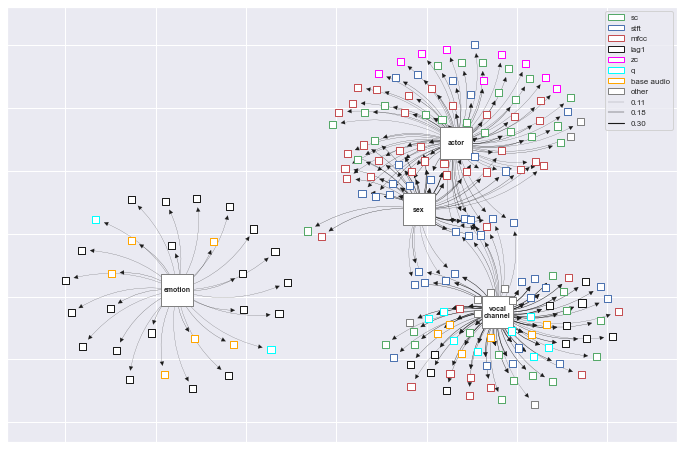

In [27]:
numeric_attr_list = [column for column in df.columns if is_numeric_dtype(df[column])]


################ DF to adjacency dict #################
ami_network = dict()
highest_ami = df_ami[df_ami.ami > 0.11]
for cat in np.unique(highest_ami.cat):
    ami_network[cat] = dict()
    for num in highest_ami[highest_ami.cat == cat].num:
        # Using a kamada-kawai embedding weight is approx. distance
        # more ami => less distance
        ami_network[cat][num] = dict(weight=0.02/highest_ami[(highest_ami.cat == cat)&(highest_ami.num == num)].ami.values[0] + 0.1, 
                                     ami=highest_ami[(highest_ami.cat == cat)&(highest_ami.num == num)].ami.values[0])

################ Network embedding #####################
G = nx.from_dict_of_dicts(ami_network)
print(G)
pos = nx.kamada_kawai_layout(G)

################ Colors using the prefx of numerical feature #################
major_families_color_map = dict(sc="g", stft="b", mfcc="r", lag1="k", zc="magenta")
minor_families_color_map = dict()
for col in numeric_attr_list:
    if col.startswith("std") or col.startswith("min") or col.startswith("max"):
        minor_families_color_map[col] = "orange"
    elif col.startswith("q"):
        minor_families_color_map[col] = "cyan"

color_map = minor_families_color_map | major_families_color_map
classes = [label.split("_")[0] for label in pos.keys()]
colors = list(map( lambda x: color_map.get(x, "gray"), classes ))

############### Bigger sizes for categories ##################
sizes = [50 if key not in np.unique(highest_ami.cat) else 1000 for key in pos.keys()]

############### Width of edges #####################
edges = G.edges()
linewidths = [13*(G[u][v]['ami'])**2 for u,v in edges]

plt.figure(figsize=(12,8))
nx.draw_networkx_nodes(G, pos, node_shape="s", node_size=sizes, edgecolors=colors, node_color="w")
nx.draw_networkx_edges(
    G, pos,
    arrows=True,
    width=linewidths,
    edge_color ="k",
    alpha=1.0,
    connectionstyle="arc3,rad=0.2" 
)

############ Text for categories #############
for cat in np.unique(highest_ami.cat):
    if cat in pos.keys():
        s = "\n".join(cat.split("_"))
        plt.text(pos[cat][0], pos[cat][1], s=s, horizontalalignment='center', verticalalignment='center', size=7, fontweight='bold')

########### Legend #############
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Patch(facecolor='w', edgecolor=major_families_color_map[key], label=key) for key in major_families_color_map.keys()]

legend_elements.append(Patch(facecolor='w', edgecolor="cyan", label="q"))
legend_elements.append(Patch(facecolor='w', edgecolor="orange", label="base audio"))
legend_elements.append(Patch(facecolor='w', edgecolor="gray", label="other"))

legend_elements += [Line2D([0, 0], [0, 0], lw=13*w**2, color="k", label=f"{w:.2f}") for w in [np.min(highest_ami.ami), 0.18, np.max(highest_ami.ami)]]

plt.legend(handles=legend_elements, loc='best', fontsize=8);

In [28]:
# Save dataset before performing correlation analysis
intermediate_dataset_path = os.path.join(DATA_FOLDER, 'intermediate_dataset.csv')
df.to_csv(intermediate_dataset_path, index=False)

## Correlated features

### Correlation by prefixes

In [29]:
prefixes = [
    'sum',
    'mean',
    'std',
    'min',
    'max',
    'kur',
    'skew',
    'lag1',
    'zc',
    'mfcc',
    'sc',
    'stft',
    'length',
    'q'
]

In [30]:
def redirect_to_file(filename, str_to_redirect):
    path = os.path.join(DATA_FOLDER, filename)
    with open(path, 'w') as f:
        f.write(str_to_redirect)

In [31]:
corr = df[numeric_attr_list].corr(method='spearman')
display(corr.head())
corr_dict = dict(corr)

deletable_keys = []
for key in corr_dict.keys():
    series = corr_dict[key]
    corr_dict[key] = series[(series.abs() > 0.95)].drop(key) # Drops the autocorrelation
    if len(corr_dict[key]) == 0:
        deletable_keys.append(key)

# Remove empty boyz
for key in deletable_keys:
    del corr_dict[key]

,frame_count,sum,mean,std,min,max,q01,q05,q25,q75,...,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_kur_w4,stft_skew_w4
frame_count,1.000000,0.036158,0.045056,0.321882,-0.190115,0.180520,-0.292354,-0.374691,-0.703040,0.720493,...,-0.618373,0.734667,-0.692240,-0.687681,-0.734732,-0.624345,-0.481688,-0.384810,-0.426852,0.101367
sum,0.036158,1.000000,0.999025,0.176411,-0.163471,0.175029,-0.165350,-0.165067,-0.128933,0.024853,...,-0.042474,0.021214,-0.039195,-0.036044,-0.024901,-0.036056,-0.047771,-0.071233,-0.019858,0.033417
mean,0.045056,0.999025,1.000000,0.177691,-0.163964,0.175345,-0.166422,-0.166983,-0.132294,0.030624,...,-0.048832,0.028308,-0.046425,-0.043410,-0.031805,-0.042469,-0.052980,-0.075647,-0.024217,0.034715
std,0.321882,0.176411,0.177691,1.000000,-0.961377,0.954496,-0.997091,-0.992325,-0.687525,0.613302,...,-0.348715,0.284948,-0.233518,-0.231862,-0.276888,-0.327142,-0.343688,-0.296157,-0.212029,0.173978
min,-0.190115,-0.163471,-0.163964,-0.961377,1.000000,-0.984137,0.967421,0.929302,0.576906,-0.508828,...,0.246164,-0.149351,0.099010,0.093872,0.134361,0.224607,0.272729,0.239599,0.139807,-0.167532


In [32]:
corr_by_prefixes = dict()

for prefix in prefixes:
    corr_by_prefixes[prefix] = dict()
    for key in corr_dict.keys():
        if key.startswith(prefix):
            corr_by_prefixes[prefix][key] = corr_dict[key]


In [33]:
to_write = ''

for prefix in corr_by_prefixes.keys():
    to_write += f'COLUMNS STARTING WITH PREFIX {prefix}:\n\n'

    for column in corr_by_prefixes[prefix].keys():
        series = corr_by_prefixes[prefix][column]

        to_write += f'\n\tCorrelated with {column}:\n'
        to_write += str(series) + '\n'

    to_write += '\n\n'

redirect_to_file('correlated_features.txt', to_write)

### Global correlation network

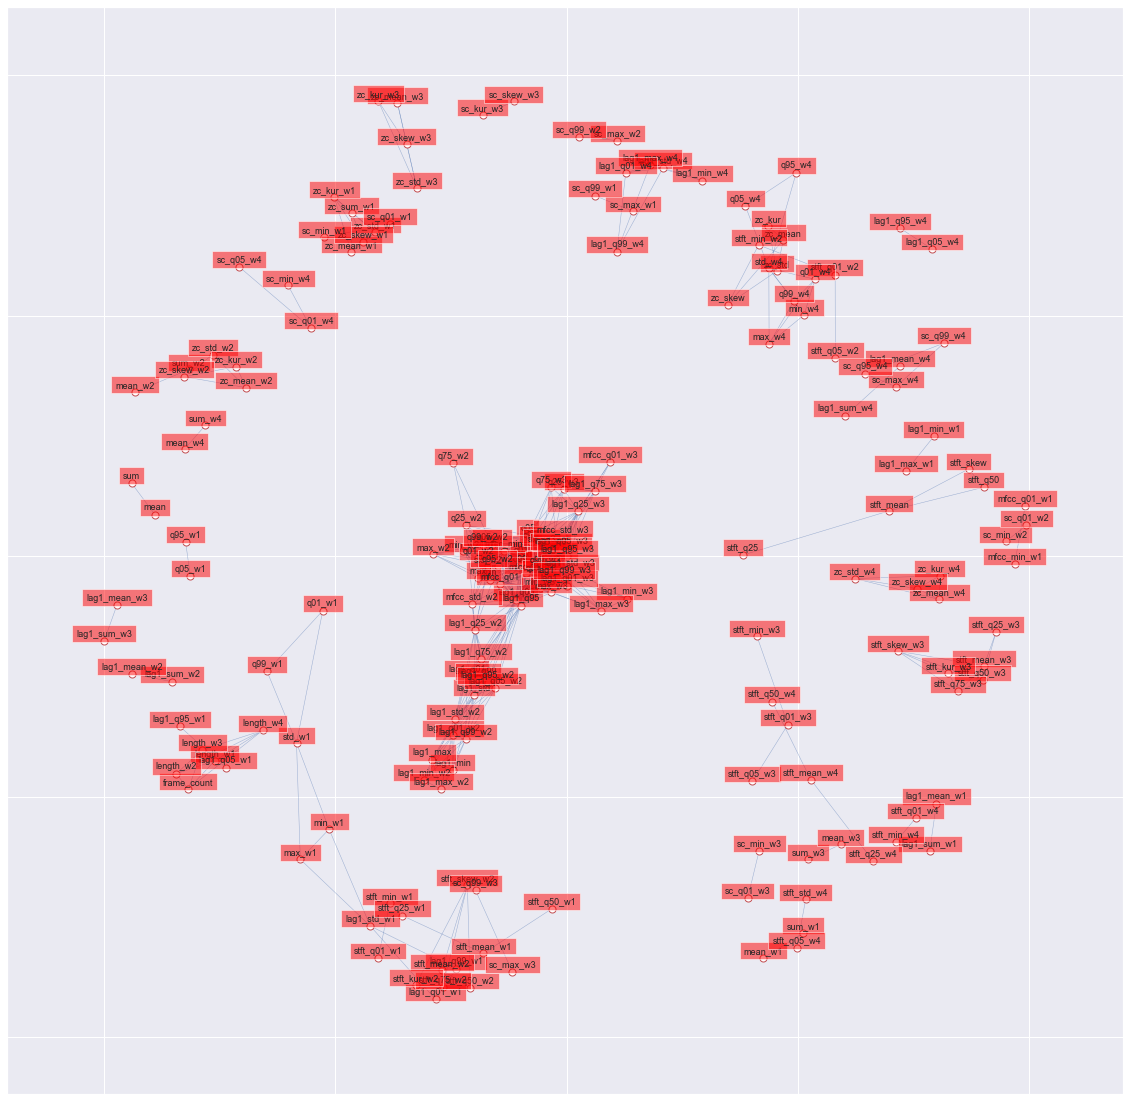

In [34]:
correlation_network = dict()

for attribute in corr_dict.keys():
    correlation_network[attribute] = dict()
    for other_attribute in corr_dict[attribute].index.values:
        correlation_network[attribute][other_attribute] = dict(weight=np.abs(corr_dict[attribute][other_attribute]))
#display(correlation_network)

plt.figure(figsize=(20,20))

G = nx.from_dict_of_dicts(correlation_network)
pos = nx.spring_layout(G, k=0.2)#nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, node_shape="o", node_size=50, edgecolors="r", node_color="w")
nx.draw_networkx_edges(
    G, pos,
    # arrows=True,
    width=0.5,
    edge_color='b',
    alpha=0.5,
    # connectionstyle="arc3,rad=0.1"  # <-- THIS IS IT
)

# labels = {key:key for key in correlation_network.keys()}
# nx.draw_networkx_labels(G, pos, font_size=12, font_color="k");
for node in pos.keys():
    plt.text(pos[node][0], pos[node][1] + 0.01, s=node, bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center', size=9)


### Correlation by window

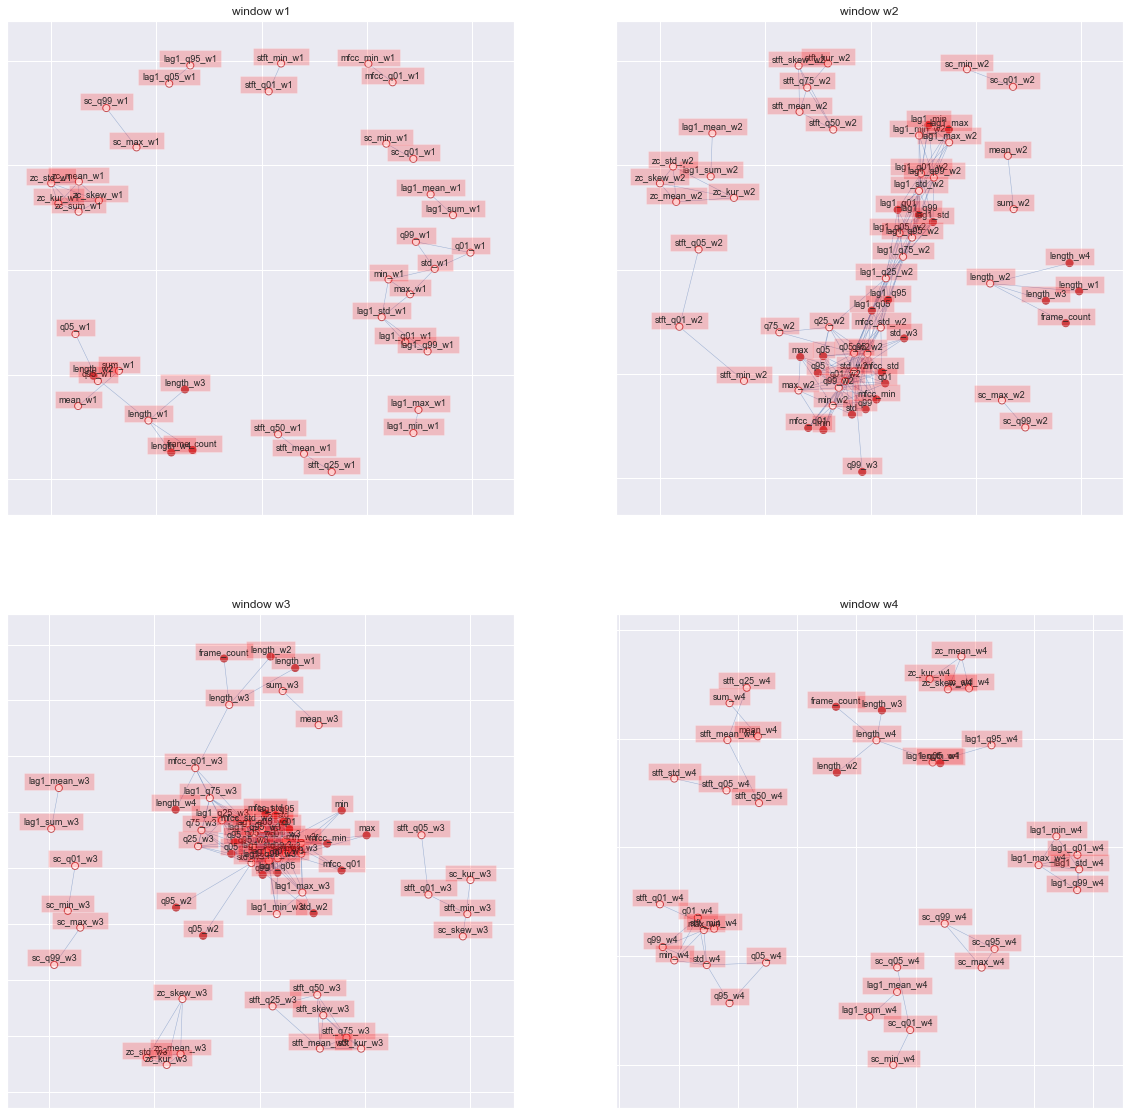

In [35]:
corr_by_window = dict()
for window in ["w1", "w2", "w3", "w4"]:
    corr_by_window[window] = dict()
    for attribute in corr_dict.keys():
        if attribute.endswith(window):
            corr_by_window[window][attribute] = dict()
            for other_attribute in corr_dict[attribute].keys():
                corr_by_window[window][attribute][other_attribute] = dict(weight = np.abs(corr_dict[attribute][other_attribute]),
                                                                          )


# display(correlation_network_by_window)
fig, axes = plt.subplots(2,2,figsize=(20,20))
axes = axes.flatten()
for window, ax in zip(["w1", "w2", "w3", "w4"], axes):

    G = nx.from_dict_of_dicts(corr_by_window[window])
    pos = nx.spring_layout(G, k=0.4)#nx.kamada_kawai_layout(G)
    node_colors = ["w" if u.endswith(window) else "r" for u in G.nodes]
    nx.draw_networkx_nodes(G, pos, node_shape="o", node_size=50, edgecolors="r", node_color=node_colors, ax=ax)
    nx.draw_networkx_edges(
        G, pos,
        # arrows=True,
        width=0.5,
        edge_color ="b",
        alpha=0.5,
        # connectionstyle="arc3,rad=0.1"  # <-- THIS IS IT
        ax=ax
    )
    ax.set_title(f"window {window}")
    # nx.draw_networkx_labels(G, pos,  font_size=8, font_color="k", ax=ax, label_pos=0.75);
    for node in pos.keys():
        ax.text(pos[node][0],pos[node][1] + 0.02,s=node, bbox=dict(facecolor='red', alpha=0.2),horizontalalignment='center', size=9)


Now (for each window) remove the highly correlated features (take one representative attribute for each subgraph).

For each subgraph takes theone that has highest ami with some category.

In [36]:
representatives = dict()
representatives_graph = dict()

for window in corr_by_window.keys():
    G = nx.from_dict_of_dicts(corr_by_window[window])

    for connected_group in nx.connected_components(G):
        scores = np.zeros(len(connected_group))
        for i, feature in enumerate(connected_group):
            if np.sum(df_ami['num'] == feature) > 0:
                # Takes the best ami value that the feature has
                scores[i] = np.max(df_ami[df_ami['num'] == feature]['ami'])
            else:
                scores[i] = -20 + shapiro(df[feature]).pvalue
                
        winner  = list(connected_group)[np.argmax(scores)]
        key     = tuple(np.sort(list(connected_group)))
        representatives[key] = winner

        representatives_graph[winner] = dict()
        for k in connected_group:
            if k != winner:
                representatives_graph[winner][k] = dict(weight=1.0)

#print(representatives)
#print(representatives_graph)

#### As can be seen in the following cell, taking a single feature from each subgraph leads to the elimination of some uncorrelated ones

In [37]:
# for instance, 14th key
key = list(representatives.keys())[14]

# the variable 'attributes' contains all the features that belong to the same subgraph
attributes = list(key)
attributes.append(representatives[key])

# correlation
df[attributes].corr(method='spearman')

,lag1_max,lag1_max_w2,lag1_min,lag1_min_w2,lag1_q01,lag1_q01_w2,lag1_q05,lag1_q05_w2,lag1_q25_w2,lag1_q75_w2,...,q75_w2,q95,q95_w2,q99,q99_w2,q99_w3,std,std_w2,std_w3,max
lag1_max,1.000000,0.994492,-0.986334,-0.982576,-0.937239,-0.956413,-0.896887,-0.929120,-0.881824,0.885246,...,0.797406,0.838179,0.851303,0.863687,0.854497,0.852250,0.858137,0.856489,0.842385,0.868960
lag1_max_w2,0.994492,1.000000,-0.985353,-0.987384,-0.931503,-0.957739,-0.888422,-0.927652,-0.878215,0.882137,...,0.792817,0.828587,0.844010,0.853075,0.846531,0.839376,0.848072,0.849308,0.829946,0.856981
lag1_min,-0.986334,-0.985353,1.000000,0.996460,0.936104,0.961132,0.891011,0.930353,0.881206,-0.885737,...,-0.794458,-0.828722,-0.842613,-0.852513,-0.844045,-0.840426,-0.847689,-0.847767,-0.830639,-0.856626
lag1_min_w2,-0.982576,-0.987384,0.996460,1.000000,0.930861,0.960862,0.884235,0.928018,0.877220,-0.881983,...,-0.790343,-0.821698,-0.836658,-0.845002,-0.838028,-0.831844,-0.840482,-0.842078,-0.822413,-0.848267
lag1_q01,-0.937239,-0.931503,0.936104,0.930861,1.000000,0.980340,0.968586,0.993874,0.958960,-0.961768,...,-0.879788,-0.906904,-0.917396,-0.927063,-0.915966,-0.913169,-0.922779,-0.921291,-0.903129,-0.920124
lag1_q01_w2,-0.956413,-0.957739,0.961132,0.960862,0.980340,1.000000,0.921993,0.983505,0.926760,-0.933092,...,-0.843655,-0.853348,-0.871740,-0.873814,-0.869667,-0.856149,-0.870239,-0.876874,-0.845759,-0.872781
lag1_q05,-0.896887,-0.888422,0.891011,0.884235,0.968586,0.921993,1.000000,0.954822,0.975934,-0.971481,...,-0.914151,-0.966509,-0.959074,-0.974876,-0.950857,-0.966305,-0.973875,-0.959698,-0.964564,-0.942813
lag1_q05_w2,-0.929120,-0.927652,0.930353,0.928018,0.993874,0.983505,0.954822,1.000000,0.961976,-0.966288,...,-0.878079,-0.888460,-0.909750,-0.908127,-0.907666,-0.886724,-0.904009,-0.913192,-0.876580,-0.902361
lag1_q25_w2,-0.881824,-0.878215,0.881206,0.877220,0.958960,0.926760,0.975934,0.961976,1.000000,-0.997945,...,-0.939843,-0.941885,-0.954598,-0.941708,-0.935792,-0.917095,-0.944627,-0.952345,-0.917281,-0.906699
lag1_q75_w2,0.885246,0.882137,-0.885737,-0.881983,-0.961768,-0.933092,-0.971481,-0.966288,-0.997945,1.000000,...,0.933788,0.931370,0.945402,0.932770,0.927463,0.908151,0.935348,0.943869,0.907351,0.901656


## Subgraphs cleaning

In [38]:
def find_correlated_subset(corr_df, threshold=0.95):
    columns_set = set(corr_df.columns)
    return recursive_correlation_check(corr_df, columns_set, threshold)

In [39]:
def recursive_correlation_check(corr_df, columns_set, threshold):

    new_columns_set = set()

    for column1 in columns_set:

        # flag to keep track of whether the column is correlated with all other columns
        all_correlated = True

        for column2 in columns_set:

            if column1 == column2:
                continue

            correlation = corr_df[column1][column2]

            # if the correlation is below the threshold, set the flag to False and stop the loop
            if correlation < threshold:
                all_correlated = False
                break

        # if the column is correlated with all other columns, add it to the new set
        if all_correlated:
            new_columns_set.add(column1)

    # if the current set is equal to the new set, the search is complete
    # return the DataFrame with related columns
    if columns_set == new_columns_set:
        return corr_df[list(columns_set)]

    # else, call the function recursively with the new set of columns
    return recursive_correlation_check(corr_df, new_columns_set, threshold)

In [40]:
keys = list(representatives.keys())
corr_subgraphs = []

for key in keys:
    attributes = list(key)
    #attributes.append(representatives[key])

    # takes the dataframe generated by the corr method
    subgraph_corr = df[attributes].corr(method='spearman')

    # apply cleaning: returns the subset of correlated features as a DataFrame
    correlated_subset = find_correlated_subset(subgraph_corr, threshold=0.95)

    correlated_subset = list(correlated_subset.columns)
    corr_subgraphs.append(correlated_subset)

## remove columns in the original dataset based on the ami value

In [41]:
def invert_dict(dictionary):
    inverted_dict = {}
    for key, value in dictionary.items():
        inverted_dict[value] = key
    return inverted_dict

In [42]:
representatives = invert_dict(representatives)

for key in representatives.keys():
    for subgraph in corr_subgraphs:
        if key in subgraph:
            representatives[key] = subgraph

df_decorrelated = df.copy()
display(df.head())
lag_dropped = set()
for key in representatives.keys():
    for attr in representatives[key]:
        try:
            if attr not in representatives.keys():
                df_decorrelated = df_decorrelated.drop(columns=[attr])
        except KeyError:
            print(f'Already dropped: {attr}')

print(f'columns left: {len(df_decorrelated.columns)}')

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,actor_1,M,158558,0.145081,9.150000e-07,...,0.791036,0.155455,0.000000,0.000000,0.566462,0.709962,0.799141,0.896606,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,actor_1,M,160160,0.114319,7.137790e-07,...,0.744699,0.163183,0.270133,0.368623,0.472736,0.623183,0.744908,0.874713,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,actor_1,M,156956,0.149963,9.554485e-07,...,0.751478,0.190634,0.000000,0.000000,0.417919,0.643636,0.774253,0.899156,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,actor_1,M,152152,0.139618,9.176213e-07,...,0.736895,0.182551,0.205616,0.306280,0.399641,0.606910,0.755213,0.886474,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,actor_1,M,169769,0.137665,8.108948e-07,...,0.744390,0.177069,0.177847,0.248765,0.428202,0.634815,0.759914,0.878014,0.126535,-0.620782


Already dropped: lag1_q05
Already dropped: lag1_q95
Already dropped: mfcc_min
Already dropped: mfcc_q01
Already dropped: mfcc_std
Already dropped: min
Already dropped: q01
Already dropped: q05
Already dropped: q05_w2
Already dropped: q95
Already dropped: q95_w2
Already dropped: q99
Already dropped: q99_w3
Already dropped: std
Already dropped: std_w2
Already dropped: std_w3
columns left: 230


## Mutual information on decorrelated dataset

Does the same as before. Both ami computation stages are needed since the decorrelated features are selected by the preliminary ami estimate.

In [43]:
numeric_attr_list = [column for column in df_decorrelated.columns if is_numeric_dtype(df_decorrelated[column])]
print(len(numeric_attr_list))
categoric_attr_list = [column for column in df_decorrelated.columns if not is_numeric_dtype(df_decorrelated[column])]
categoric_attr_list

223


['vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'actor',
 'sex']

In [44]:
df_binned_decorrelated = pd.DataFrame(columns=numeric_attr_list)
for column in numeric_attr_list:
    try:
        df_binned_decorrelated[column] = pd.qcut(df_decorrelated[column], q=10)
    except ValueError:
        print(column, file=sys.stderr, end=' ')

lag1_q25 lag1_q75 mfcc_q50 mfcc_q75 sc_min sc_q01 sc_q05 stft_min stft_q01 stft_q05 q05_w1 lag1_mean_w1 lag1_q05_w1 mfcc_q01_w1 mfcc_q25_w1 mfcc_q50_w1 mfcc_q75_w1 sc_q01_w1 sc_q05_w1 sc_q25_w1 sc_q50_w1 stft_q01_w1 stft_q05_w1 stft_q25_w1 stft_q50_w1 q50_w2 q50_w3 lag1_q50_w3 q75_w4 lag1_q05_w4 

In [45]:
df_binned_decorrelated = df_binned_decorrelated.dropna(axis=1, how='all')

In [46]:
from sklearn.metrics import adjusted_mutual_info_score as ami

# df_ami_decorrelated = pd.DataFrame(columns=['num', 'cat', 'ami'])
# for column_i in df_binned_decorrelated.columns:
#    for column_j in categoric_attr_list:
#        row = dict(num=column_i, cat=column_j, ami=ami(df_binned_decorrelated[column_i], df_decorrelated[column_j]))
#        row = pd.DataFrame(row, index=[0])
#        df_ami_decorrelated = pd.concat([df_ami_decorrelated, row])

decorrelated_ami_csv_path = os.path.join(DATA_FOLDER, 'df_ami_decorrelated.csv')
# df_ami_decorrelated.to_csv(decorrelated_ami_csv_path, index=False)

# Since my pc takes 2 mins to compute the ami_df
# save and read

df_ami_decorrelated = pd.read_csv(decorrelated_ami_csv_path)
df_ami_decorrelated

,num,cat,ami
0,sum,vocal_channel,0.038927
1,sum,emotion,0.026154
2,sum,emotional_intensity,0.013567
3,sum,statement,0.003883
4,sum,repetition,-0.000368
...,...,...,...
1080,stft_skew_w4,emotional_intensity,0.004788
1081,stft_skew_w4,statement,-0.000400
1082,stft_skew_w4,repetition,0.000556
1083,stft_skew_w4,actor,0.051081


Now build the graph of ami

Graph with 102 nodes and 134 edges


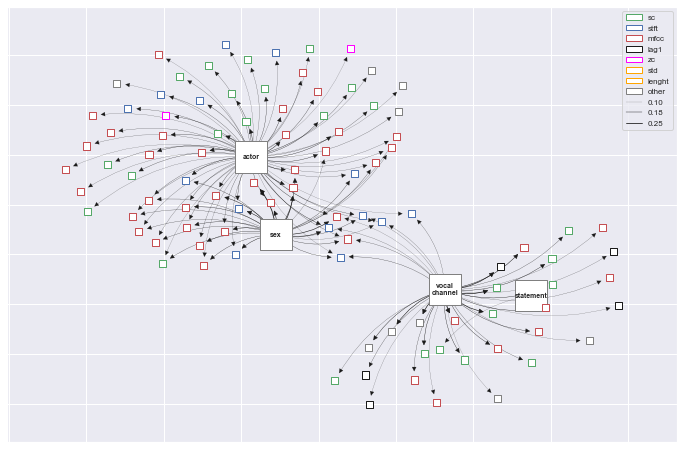

In [47]:
################ DF to adjacency dict #################
ami_network = dict()
highest_ami = df_ami_decorrelated[df_ami_decorrelated.ami > 0.1]
for cat in np.unique(highest_ami.cat):
    ami_network[cat] = dict()
    for num in highest_ami[highest_ami.cat == cat].num:
        # Using a kamada-kawai embedding weight is approx. distance
        # more ami => less distance
        ami_network[cat][num] = dict(weight=0.02/highest_ami[(highest_ami.cat == cat)&(highest_ami.num == num)].ami.values[0] + 0.1,
                                     ami = highest_ami[(highest_ami.cat == cat)&(highest_ami.num == num)].ami.values[0])

################ Network embedding #####################
G = nx.from_dict_of_dicts(ami_network)
print(G)
pos = nx.kamada_kawai_layout(G)

################ Colors using the prefx of numerical feature #################
color_map = dict(sc="g", stft="b", mfcc="r", lag1="k", zc="magenta", std="orange", lenght="orange")
classes = [label.split("_")[0] for label in pos.keys()]
colors = list(map( lambda x: color_map.get(x, "gray"), classes ))

############### Bigger sizes for categories ##################
sizes = [50 if key not in np.unique(highest_ami.cat) else 1000 for key in pos.keys()]

############### Width of edges #####################
edges = G.edges()
linewidths = [13*(G[u][v]['ami'])**2 for u,v in edges]

plt.figure(figsize=(12,8))
nx.draw_networkx_nodes(G, pos, node_shape="s", node_size=sizes, edgecolors=colors, node_color="w")
nx.draw_networkx_edges(
    G, pos,
    arrows=True,
    width=linewidths,
    edge_color ="k",
    alpha=1.0,
    connectionstyle="arc3,rad=0.2" 
)

############ Text for categories #############
for cat in np.unique(highest_ami.cat):
    if cat in pos.keys():
        s = "\n".join(cat.split("_"))
        plt.text(pos[cat][0], pos[cat][1], s=s, horizontalalignment='center', verticalalignment='center', size=7, fontweight='bold')

########### Legend #############
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Patch(facecolor='w', edgecolor=color_map[key], label=key) for key in color_map.keys()]
legend_elements.append(Patch(facecolor='w', edgecolor="gray", label="other"))
legend_elements += [Line2D([0, 0], [0, 0], lw=13*w**2, color="k", label=f"{w:.2f}") for w in [np.min(highest_ami.ami), 0.18, np.max(highest_ami.ami)]]
plt.legend(handles=legend_elements, loc='best', fontsize=8);

In [48]:
df_decorrelated.to_csv(PREPROCESSED_DATA, index=False)